In [1]:
using Gen, Plots, LinearAlgebra


In [1]:
# println("Hello World")

# function init_ball()

# function simulate(ball_p0, ball_v0, walls, object, number_of_time steps, distribution of jitter)
#     # ie: init ball params, environment params, simulation params
    
    
#     first_hit = hit(ball_p0, ball_v0, walls, object)
#     return list_of ball positions (maybe without the_ones under the_occluder)


In [105]:
function getRotationMatrix(theta)
    return [cos(theta) -sin(theta); sin(theta) cos(theta)]
end

getRotationMatrix (generic function with 2 methods)

In [30]:
function collide1(position, entity)
    # walls = ([-2.0, -2.0], [2.0, 2.0])
    # object = ([-1.0, -1.0], [1.0, 1.0])
    # Check if the position is inside the entity
    if (position[1] >= entity[1][1] && position[1] <= entity[2][1] &&
            position[2] >= entity[1][2] && position[2] <= entity[2][2])
        if position[1] >= entity[1][1]
end


collide (generic function with 1 method)

In [106]:
function collide(position, entity)
    ABn = entity[1] # normal defining AB
    BCn = entity[2]
    CDn = entity[3]
    DAn = entity[4]

    if Transpose(ABn) * position + 1 < 0 # assumes that the box is side length 2, centered at (0,0)
        return false
    end
     if Transpose(BCn) * position + 1 < 0
        return false
    end
    if Transpose(CDn) * position + 1 < 0
        return false
    end
    if Transpose(DAn) * position + 1 < 0
        return false
    end
    return true
    
end

collide2 (generic function with 1 method)

In [125]:
@gen function simulate_ball_model_collision_jitter_sparse(ball_p0, ball_v0, walls, object, num_steps, jitter_std)
    ball_positions = Vector{Vector{Float64}}(undef, num_steps)

    ball_p = copy(ball_p0)  # Ensure ball_p is a copy to avoid modifying the original ball_p0
    ball_v = ball_v0

    collided = false  # Flag to track whether a collision has occurred

    for step in 1:num_steps
        # Exit the loop if a collision has occurred
        # if collided
        #     ball_
        # end

        # Simulate ball movement
        ball_p += ball_v

        # Check for collisions with walls
        # for wall in walls
        #     if collide(ball_p, wall)
        #         ball_v = reflect(ball_v, wall)
        #         ball_p[1] += randn() * jitter_std  # Add jitter to the x-coordinate
        #         ball_p[2] += randn() * jitter_std  # Add jitter to the y-coordinate
        #     end
        # end

        # Check for collisions with the object
        if collide(ball_p, object)
            ball_p -= ball_v #back up
            normal = -[-1.0, 0.0]
            ball_v = reflect(ball_v, normal)
            # normal = normalize(object[2] - object[1])
            # ball_v = reflect(ball_v, (object[1], object[2], normal))
            ball_p += ball_v
            ball_p[1] += randn() * jitter_std  # Add jitter to the x-coordinate
            ball_p[2] += randn() * jitter_std  # Add jitter to the y-coordinate
            collided = true  # Set the flag to indicate a collision
        end

        # Add jitter to the current position in the ground truth trajectory
        ball_p[1] += randn() * jitter_std
        ball_p[2] += randn() * jitter_std

        ball_positions[step] = copy(ball_p)
    end

    return ball_positions
end


DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[Any, Any, Any, Any, Any, Any], false, Union{Nothing, Some{Any}}[nothing, nothing, nothing, nothing, nothing, nothing], var"##simulate_ball_model_collision_jitter_sparse#364", Bool[0, 0, 0, 0, 0, 0], false)

In [126]:
function is_inside_room(position, walls, object)
    # Check if the position is inside the room (within walls and object)
    return all(collide(position, wall) for wall in walls) && collide(position, object)
end

function reflect(v, normal)
    # Reflect the vector v based on the collision with the wall
    # normal = normalize(wall[2] - wall[1])
    # dot_product = dot(v, normal)
    # V_in - 2 * (Transpose(V_in) * n) * n
    return v - 2 * (Transpose(v) * normal) * normal
end

reflect (generic function with 1 method)

In [153]:
function simulate_and_plot_collision(ball_p0, ball_v0, walls, object, num_steps, jitter_std)
    model = simulate_ball_model_collision_jitter_sparse
    (trace, _) = generate(model, (ball_p0, ball_v0, walls, object, num_steps, jitter_std))

    ball_positions = get_retval(trace)

    plot_trajectory(ball_positions, walls, object)
end

function plot_trajectory(ball_positions, walls, object)
    p = plot()

    # Plot walls as a square
    # plot!([0, 10, 10, 0, 0], [0, 0, 10, 10, 0], color=:black, linewidth=2, label="Walls")
    # plot!([0, 10, 10, 0, 0], [0, 0, 10, 10, 0], color=:black, linewidth=2, label="Walls")

    # Center of the room (within the walls)
    center_x = 0
    center_y = 0

    # Plot object as a square centered at (5,5)
    # object_width = min(10, object[2][1] - object[1][1])
    # object_height = min(10, object[2][2] - object[1][2])
    object_width =  object[2][1] - object[1][1]
    object_height = object[2][2] - object[1][2]

    Xl = object[1][1]
    Yl = object[1][2]
    Xu = object[2][1]
    Yu = object[2][2]

    plot!([Xu, Xl, Xl, Xu, Xu],[Yu, Yu, Yl, Yl, Yu],
      color=:red, linewidth=2, linestyle=:solid, label="Object")

    # plot!([object[1][1],object[1][2],object[2][1],object[2][2]], color=:red, linewidth=2, linestyle=:solid, label="Object")

    # plot!([center_x - object_width / 2, center_x + object_width / 2, center_x + object_width / 2, center_x - object_width / 2, center_x - object_width / 2],
    #   color=:red, linewidth=2, linestyle=:solid, label="Object")

    # plot!([center_x - object_width / 2, center_x + object_width / 2, center_x + object_width / 2, center_x - object_width / 2, center_x - object_width / 2],
    #       [center_y - object_height / 2, center_y - object_height / 2, center_y + object_height / 2, center_y + object_height / 2, center_y - object_height / 2],
    #       color=:red, linewidth=2, linestyle=:solid, label="Object")

    # Plot ball trajectory
    plot!(map(x -> x[1], ball_positions), map(x -> x[2], ball_positions),
          marker=:circle, markersize=5, label="Ball")

    display(p)
end

plot_trajectory (generic function with 1 method)

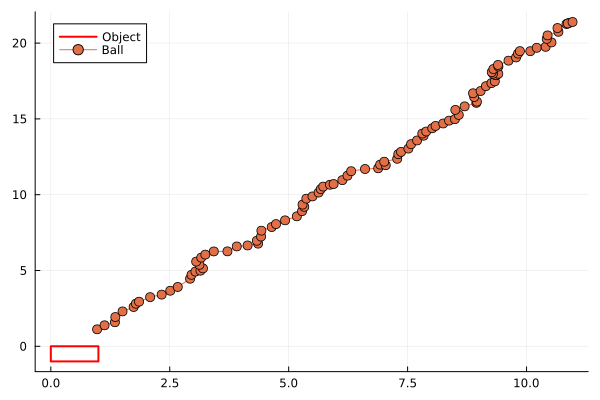

In [156]:
# Example usage
ball_p0 = [1.0, 1.0]
ball_v0 = [0.1, 0.2]
# walls = [([0.0, 0.0], [5.0, 0.1]), ([0.0, 0.0], [0.1, 5.0]),
#          ([5.0, 0.0], [5.1, 5.0]), ([0.0, 5.0], [5.0, 5.1])]
walls = ([-2.0, -2.0], [2.0, 2.0])
object = ([-1.0, -1.0], [2.0, 2.0])
object2 = ([0.0, -1.0], [1.0, 0.0], [0.0, 1.0], [-1.0, 0.0], [1.0,1.0], [-1.0,1.0], [-1.0,-1.0], [1.0,-1.0])
num_steps = 100
jitter_std = 0.1  # Set the standard deviation for jitter

simulate_and_plot_collision(ball_p0, ball_v0, walls, object2, num_steps, jitter_std)

In [133]:
object2 = ([0.0, -1.0], [1.0, 0.0], [0.0, 1.0], [-1.0, 0.0])
position = [2.0,0.0]
object2 = ([0.0, -1.0], [1.0, 0.0], [0.0, 1.0], [-1.0, 0.0])

([0.0, -1.0], [1.0, 0.0], [0.0, 1.0], [-1.0, 0.0])

In [145]:
    model = simulate_ball_model_collision_jitter_sparse
    (trace, _) = generate(model, (ball_p0, ball_v0, walls, object, num_steps, jitter_std))

    ball_positions = get_retval(trace)

100-element Vector{Vector{Float64}}:
 [1.0972768603598935, 1.0425924450041189]
 [1.0701066120020297, 1.2686883801451354]
 [0.9134787850322772, 1.3575254524544023]
 [1.161212307455444, 1.5836295314921924]
 [0.9453464683642864, 1.6848849196080369]
 [1.0724638079262103, 2.0023446473166366]
 [1.1300013176767525, 2.0593033781639822]
 [1.1141586521421625, 2.1321461834328175]
 [1.439867135668976, 2.332810297794549]
 [1.585353596494623, 2.404034668266992]
 [1.7572871259900715, 2.451611982179621]
 [1.6424717580370958, 2.637576751161313]
 [1.8611571827114621, 2.8180109717424697]
 ⋮
 [8.582058697662486, 18.033693366324332]
 [8.74621960689497, 18.34743495588861]
 [8.831705637912666, 18.736573735532524]
 [8.666085119526299, 18.854318595225784]
 [8.795697271347235, 19.071548471576683]
 [8.91769105679509, 19.076661788651272]
 [8.985381620421109, 19.190664356373684]
 [8.92468887605576, 19.51845919142452]
 [9.068408044836067, 19.713875809104685]
 [8.918564275152258, 19.975275117255975]
 [8.974509531984

In [150]:
ball_positions[1,:]

1-element Vector{Vector{Float64}}:
 [1.0972768603598935, 1.0425924450041189]

In [152]:
map(x -> x[1],ball_positions)

100-element Vector{Float64}:
 1.0972768603598935
 1.0701066120020297
 0.9134787850322772
 1.161212307455444
 0.9453464683642864
 1.0724638079262103
 1.1300013176767525
 1.1141586521421625
 1.439867135668976
 1.585353596494623
 1.7572871259900715
 1.6424717580370958
 1.8611571827114621
 ⋮
 8.582058697662486
 8.74621960689497
 8.831705637912666
 8.666085119526299
 8.795697271347235
 8.91769105679509
 8.985381620421109
 8.92468887605576
 9.068408044836067
 8.918564275152258
 8.974509531984367
 8.952987912493478